In [1]:
import pandas as pd
import yfinance as yf
import numpy as np 

In [2]:
btc_data = yf.download('BTC-USD', start='2017-01-01', end='2022-01-01')
btc_df = pd.DataFrame(btc_data)

[*********************100%***********************]  1 of 1 completed


In [3]:
btc_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008
2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992
2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000
2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984
2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,510199008


In [4]:
btc_df['actual_returns'] = btc_df['Close'].pct_change()
btc_df.dropna()
display(btc_df.head())
display(btc_df.tail())

,Open,High,Low,Close,Adj Close,Volume,actual_returns
Date,,,,,,,
2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008,NaN
2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992,0.023464
2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000,0.021620
2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984,0.106233
2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,510199008,-0.122410


,Open,High,Low,Close,Adj Close,Volume,actual_returns
Date,,,,,,,
2021-12-28,50679.859375,50679.859375,47414.210938,47588.855469,47588.855469,33430376883,-0.060259
2021-12-29,47623.871094,48119.742188,46201.496094,46444.710938,46444.710938,30049226299,-0.024042
2021-12-30,46490.605469,47879.964844,46060.312500,47178.125000,47178.125000,26686491018,0.015791
2021-12-31,47169.371094,48472.527344,45819.953125,46306.445312,46306.445312,36974172400,-0.018476
2022-01-01,46311.746094,47827.312500,46288.484375,47686.812500,47686.812500,24582667004,0.029809


In [20]:
short_window = 8
btc_df['sma_fast'] = btc_df['Close'].rolling(window=short_window).mean().dropna()

In [21]:
long_window = 21
btc_df['sma_slow'] = btc_df['Close'].rolling(window=long_window).mean().dropna()

In [25]:
btc_df = btc_df.dropna()
btc_df.head()

,Open,High,Low,Close,Adj Close,Volume,actual_returns,sma_fast,sma_slow
Date,,,,,,,,,
2017-01-21,895.549011,927.367004,895.534973,921.789001,921.789001,111158000,0.029902,872.773491,912.060948
2017-01-22,922.205017,937.525024,897.564026,924.672974,924.672974,116573000,0.003129,886.056114,908.553708
2017-01-23,925.499023,928.265991,916.737976,921.012024,921.012024,73588600,-0.003959,898.457870,903.756662
2017-01-24,910.677002,924.145020,892.286011,892.687012,892.687012,111349000,-0.030754,906.101997,896.558902
2017-01-25,891.924011,903.252014,891.687012,901.541992,901.541992,120831000,0.009919,905.302498,884.502331


In [15]:
# features set 
X = btc_df[['sma_fast','sma_slow']].copy().dropna()
display(X.head())
display(X.tail())

,sma_fast,sma_slow
Date,,
2017-01-21,872.773491,912.060948
2017-01-22,886.056114,908.553708
2017-01-23,898.457870,903.756662
2017-01-24,906.101997,896.558902
2017-01-25,905.302498,884.502331


,sma_fast,sma_slow
Date,,
2021-12-28,49830.063477,48574.859561
2021-12-29,49518.575684,48381.522135
2021-12-30,49337.277344,48357.998512
2021-12-31,48777.515625,48313.386161
2022-01-01,48385.592773,48233.591146


In [27]:
# target set 
btc_df['signal'] = 0.0

In [28]:
# buy signal
btc_df.loc[(btc_df['actual_returns'] >= 0), 'signal'] = 1

In [29]:
# sell signal
btc_df.loc[(btc_df['actual_returns'] < 0), 'signal'] = -1

In [30]:
y = btc_df['signal'].copy()

In [31]:
from pandas.tseries.offsets import DateOffset

In [33]:
train_start = X.index.min()
print(train_start)

2017-01-21 00:00:00


In [35]:
train_end = X.index.min() + DateOffset(years=3)
print(train_end)

2020-01-21 00:00:00


In [36]:
X_train = X.loc[train_start:train_end]
y_train = y.loc[train_start:train_end]
X_train.head()

,sma_fast,sma_slow
Date,,
2017-01-21,872.773491,912.060948
2017-01-22,886.056114,908.553708
2017-01-23,898.457870,903.756662
2017-01-24,906.101997,896.558902
2017-01-25,905.302498,884.502331


In [37]:
X_test = X.loc[train_end:]
y_test = y.loc[train_end:]
X_test.head()

,sma_fast,sma_slow
Date,,
2020-01-21,8792.523804,8148.824730
2020-01-22,8774.162720,8219.334333
2020-01-23,8724.100830,8287.003162
2020-01-24,8689.306885,8339.410319
2020-01-25,8619.158081,8384.990839


In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [41]:
from sklearn import svm
from sklearn.metrics import classification_report

In [43]:
svm_model = svm.SVC()
svm_model = svm_model.fit(X_train_scaled, y_train)
training_signal_predictions = svm_model.predict(X_train_scaled)
training_signal_predictions[:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [44]:
training_report = classification_report(y_train, training_signal_predictions)
print(training_report)

              precision    recall  f1-score   support

        -1.0       0.56      0.17      0.26       495
         1.0       0.56      0.89      0.69       601

    accuracy                           0.56      1096
   macro avg       0.56      0.53      0.47      1096
weighted avg       0.56      0.56      0.50      1096



In [47]:
testing_signal_predictions = svm_model.predict(X_test_scaled)

In [48]:
svm_testing_report = classification_report(y_test, testing_signal_predictions)
print(svm_testing_report)

              precision    recall  f1-score   support

        -1.0       0.45      0.22      0.30       329
         1.0       0.53      0.76      0.63       383

    accuracy                           0.51       712
   macro avg       0.49      0.49      0.46       712
weighted avg       0.49      0.51      0.48       712



In [52]:
predictions_df = pd.DataFrame(index=X_test.index)
predictions_df['predicted_signal'] = testing_signal_predictions
predictions_df['actual_returns'] = btc_df['actual_returns']
predictions_df['trading_algo_returns'] = predictions_df['actual_returns'] * predictions_df['predicted_signal']
predictions_df.head()

,predicted_signal,actual_returns,trading_algo_returns
Date,,,
2020-01-21,1.0,0.010194,0.010194
2020-01-22,1.0,-0.007434,-0.007434
2020-01-23,1.0,-0.031605,-0.031605
2020-01-24,1.0,0.004630,0.004630
2020-01-25,1.0,-0.009187,-0.009187


<AxesSubplot:xlabel='Date'>

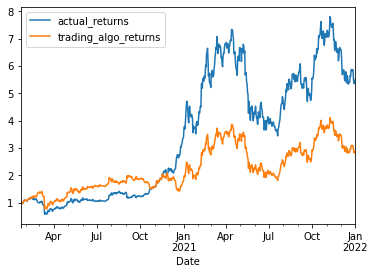

In [53]:
(1 + predictions_df[['actual_returns', 'trading_algo_returns']]).cumprod().plot()

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
log_reg_model = LogisticRegression()

In [56]:
log_reg_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [59]:
logreg_train_signal_pred = log_reg_model.predict(X_train_scaled)
logreg_train_signal_pred[:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [61]:
logreg_train_report = classification_report(y_train, logreg_train_signal_pred)
print(logreg_train_report)

              precision    recall  f1-score   support

        -1.0       0.55      0.22      0.31       495
         1.0       0.57      0.86      0.68       601

    accuracy                           0.57      1096
   macro avg       0.56      0.54      0.50      1096
weighted avg       0.56      0.57      0.52      1096



In [62]:
logreg_test_signal_pred = log_reg_model.predict(X_test_scaled)

In [65]:
logreg_test_report = classification_report(y_test, logreg_test_signal_pred)

In [66]:
print('Logistic Regression Classification Report')
print(logreg_test_report)

Logistic Regression Classification Report
              precision    recall  f1-score   support

        -1.0       0.47      0.80      0.59       329
         1.0       0.56      0.22      0.32       383

    accuracy                           0.49       712
   macro avg       0.52      0.51      0.45       712
weighted avg       0.52      0.49      0.44       712



In [68]:
print('SVM Classification Report')
print(svm_testing_report)

SVM Classification Report
              precision    recall  f1-score   support

        -1.0       0.45      0.22      0.30       329
         1.0       0.53      0.76      0.63       383

    accuracy                           0.51       712
   macro avg       0.49      0.49      0.46       712
weighted avg       0.49      0.51      0.48       712



<AxesSubplot:xlabel='Date'>

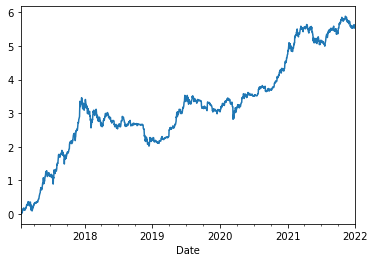

In [69]:
btc_df['actual_returns'].cumsum().plot()